In [1]:
%%capture
!pip install tensorflow opencv-python

# Data Loading

In [2]:
# from google.colab import drive
import zipfile
import os
# Mount Google Drive
# drive.mount('/content/drive')

In [3]:
# !ls /content/drive/MyDrive/uptrain/DATA/

In [4]:
def unzip_file(zip_path, extract_path):
  """A function for unzip the zip data and saved in new dir
  Args:
  zip_path(str):a zip path
  extract_path(str): a new path for data extarction
  """
  # create new folder for data
  os.makedirs(extract_path,exist_ok=True)
  # Handling error like file,dir etc
  try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      print(zip_path)
      zip_ref.extractall(extract_path)
      #print dir for using in future
      # for root,dirs,files in os.walk(extract_path):
        # for dir in dirs:
          # print(os.path.join(root,dir))
  except Exception as e:
    print(f"given {zip_path} not found. \ncomplete error is this\n {e}")

# Unzip the file
zip_path = '/content/drive/MyDrive/uptrain/DATA/archive (3).zip'
# unzip_file(zip_path,'Bottle_Data')

# Data Preprocessing

In [5]:
import os
import shutil
import random
import cv2

**Data preparation**

In [6]:
def check_size(file):
    """Checks the size of an image and resizes it if it's smaller than a target size.
   Args:
       file (str): The path to the image file to check and resize.
   Raises:
       FileNotFoundError: If the specified image file is not found.
   Side Effects:
       - Resizes the image in-place if it's smaller than the target size.
   """
  img = cv2.imread(file)
  # Check the shape of the image
  height, width, _ = img.shape
  # print(img.shape)
  target_size=(256,256)
  # If the shape is less than target_size, resize the image
  if height < target_size[0] or width < target_size[1]:
    img = cv2.resize(img, target_size)
    cv2.imwrite(file,img)

In [7]:
def copy_check_size(images,num_train,num_val,num_test,train_folder_path,test_folder_path,val_folder_path):
    """Copies and checks the size of images, distributing them into train, validation, and test sets.
   Args:
       images (list): A list of tuples, where each tuple contains (source_path, image_name).
       num_train (int): The number of images to allocate to the training set.
       num_val (int): The number of images to allocate to the validation set.
       num_test (int): The number of images to allocate to the test set.
       train_folder_path (str): The path to the folder where training images will be copied.
       test_folder_path (str): The path to the folder where test images will be copied.
       val_folder_path (str): The path to the folder where validation images will be copied.
   Raises:
       Exception: If an error occurs during image processing.
   """
  #Copy images to the 'train' folder
  #taking only 5k images for RAM availability
  for img_name in images[:num_train]:
    src_path = img_name[0]
    try:
      check_size(src_path)
    except Exception as e:
      print(e)
    img=img_name[1]
    dst_path = os.path.join(train_folder_path, img)
    shutil.copy(src_path, dst_path)
  #Copy images to the 'val' folder
  for img_name in images[num_train:(num_train+num_val)]:
    src_path = img_name[0]
    try:
      check_size(src_path)
    except Exception as e:
      print(e)
    dst_path = os.path.join(val_folder_path, img_name[1])
    shutil.copy(src_path, dst_path)
  #copy in test
  for img_name in images[(num_train+num_val):]:
    src_path = img_name[0]
    try:
      check_size(src_path)
    except Exception as e:
      print(e)
    dst_path = os.path.join(test_folder_path, img_name[1])
    shutil.copy(src_path, dst_path)


In [8]:
def train_test(folders):
  """Creates train, validation, and test sets from a given image dataset.
   Args:
       folders (str): The path to the root directory containing the image dataset.
   Raises:
       Exception: If an error occurs during image processing.
   """
  images=[]
  for root,dirs,files in os.walk(folders):
    for dir in dirs:
      # print(dir)
      p=os.path.join(folders,dir)
      for root,dir,files in os.walk(p):
        for f in files:
          i=os.path.join(p,f)
          images.append((i,f))
  #Shuffle the list of images randomly
  images=images[0:3000]
  random.shuffle(images)
  #Calculate the number of images for training,testing ,val
  train_ratio=0.7
  val_ratio=0.10
  num_train = int(train_ratio * len(images))
  num_val = int(val_ratio*len(images))
  num_test=len(images)-num_val-num_train

  # Create 'train', 'val',and 'test' folders inside the dataset folder
  dataset='dataset_lfw_single_coor'
  train_folder_path = os.path.join(dataset, 'train')
  print(train_folder_path)
  test_folder_path = os.path.join(dataset, 'test')
  val_folder_path=os.path.join(dataset,'val')
  os.makedirs(train_folder_path, exist_ok=True)
  os.makedirs(test_folder_path, exist_ok=True)
  os.makedirs(val_folder_path,exist_ok=True)
  try:
    copy_check_size(images,num_train,num_val,num_test,train_folder_path,test_folder_path,val_folder_path)
  except Exception as e:
    print(e)
  print(f"{dataset} created for new data folder.")
  print(f"Dataset created with {num_train} images for training \n{num_test} images for testing\n {num_val} for validation.")

train_test('/kaggle/input/data-face/lfw-deepfunneled/lfw-deepfunneled')

dataset_lfw_single_coor/train
dataset_lfw_single_coor created for new data folder.
Dataset created with 2100 images for training 
600 images for testing
 300 for validation.


**Data visualization**

2100


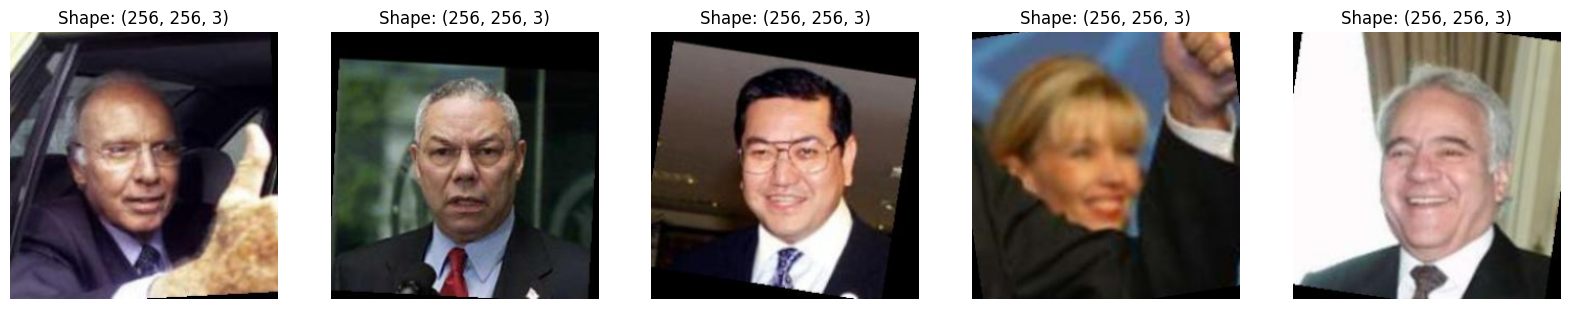

In [9]:
import matplotlib.pyplot as plt
def show_random_images(folder_path, num_images=5, target_size=(256, 256)):
    """Displays a random sample of images from a given folder.
   Args:
       folder_path (str): The path to the folder containing images.
       num_images (int, optional): The number of images to display. Defaults to 5.
       target_size (tuple, optional): The desired size to resize images to. Defaults to (256, 256).
   Raises:
       FileNotFoundError: If the specified folder path is not found.
   """
  # Get a list of all image files in the folder
  all_images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
  print(len(all_images))
  # Randomly select num_images from the list
  selected_images = random.sample(all_images, min(num_images, len(all_images)))
  # Display and process each selected image
  fig, axes = plt.subplots(1, len(selected_images), figsize=(20, 5))
  for i,img_name in enumerate(selected_images):
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path)
    # Check the shape of the image
    height, width, _ = img.shape
    # If the shape is less than target_size, resize the image
    if height < target_size[0] or width < target_size[1]:
      img = cv2.resize(img, target_size)
    # Display the image
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Shape: {img.shape}")
    axes[i].axis('off')
  plt.show()
show_random_images('/kaggle/working/dataset_lfw_single_coor/train',)


**Data Annotation**


1.   we can randomely annotate a single coordinate on images anywhere like (100,134).
2.   we can draw a bounding boxes around single pixel with 1 pixel hieght an width.
3.  draw a coordinate on specific location like eye,nose etc on images using tools.



In [10]:
%%capture
# !pip install dlib

In [11]:
def annotate_points(image_path, points):
    """Annotates an image with circles at specified points.
    Args:
        image_path (str): The path to the image file to annotate.
        points (list): A list of (x, y) coordinates representing the points to annotate.
    Raises:
        cv2.error: If the image cannot be loaded.
    """
    # Load the image
    img = cv2.imread(image_path)
    # Draw circles around the specified points
    for point in points:
        x, y = point
        cv2.circle(img, (x, y), 5, (10, 100, 10),-1)  
    # Display the annotated image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Annotated Points")
    plt.axis('off')
    plt.show()

# annotate_points('', [(130, 160)])


In [12]:
# Create a zip archive of the folder
# shutil.make_archive('/content/bottle_dataset', 'zip', '/content/dataset_lfw_single_coor')

In [13]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd

2024-02-05 05:35:02.589459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 05:35:02.589554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 05:35:02.707811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
def annotate(dir):
    """Collects images and placeholders for annotations from a directory.
    Args:
        dir (str): The path to the directory containing images.
    Returns:
        tuple: A tuple containing two NumPy arrays:
            - images: A 4D array of shape (num_images, height, width, channels)
                      representing the loaded images.
            - annotations: A 2D array of shape (num_images, 2) containing
                           (x, y) coordinates for placeholder annotations.
    Raises:
        FileNotFoundError: If the specified directory path is not found.
    """
    images = []
    annotations = []
    dataset_path = dir
    if os.path.isdir(dataset_path):
        for image_file in os.listdir(dataset_path):
            image_path = os.path.join(dataset_path, image_file)
            #  ends with a common image extension
            if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image = cv2.imread(image_path)
                image = cv2.resize(image, (256, 256))  # Resize to 256x256 if not, previously i handled it
#                 image=np.array(image)/255.0
                images.append(image)
    # Placeholder for annotation 
                annotations.append((130, 160))  # Assuming the size is 256x256
            else:
                print(f"{dataset_path}is not dir")
    images = np.array(images) / 255.0
    annotations = np.array(annotations)
    return images,annotations

train_images,train_coor=annotate('/kaggle/working/dataset_lfw_single_coor/train')
test_images,test_coor=annotate('/kaggle/working/dataset_lfw_single_coor/test')
val_images,val_coor=annotate('/kaggle/working/dataset_lfw_single_coor/val')
print(f"Data Statistic\n train X {len(train_images)} ,y {len(train_coor)}\n test X {len(test_images)} ,y {len(test_coor)}\n val X {len(val_images)},y {len(val_coor)}")

Data Statistic
 train X 2100 ,y 2100
 test X 600 ,y 600
 val X 300,y 300


In [15]:
train_images[0].shape,train_coor[0].shape

((256, 256, 3), (2,))

In [16]:
train_images[0],train_coor[0]

(array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([130, 160]))

# Build Model


1.   using Tensorflow or Pytorch
2.   Pytorch is more dynamic for complex model



In [17]:
len(train_images),len(train_coor)

(2100, 2100)

In [18]:
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# learning rate scheduler for dynamic optimization when performance will not improve after 3 epochs
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)
# early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Data augmentation if needed but i will not use it now
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [30]:
def Pixel_localization_model(input_shape=(256, 256, 3)):
   """Creates a convolutional neural network for regression tasks.
   Args:
       input_shape (tuple, optional): The shape of the input images.
           Defaults to (256, 256, 3).
   Returns:
       keras.models.Model: The compiled model.
   """
   model = models.Sequential()
   # Convolutional layers for feature extraction
   model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
   model.add(layers.BatchNormalization())
   model.add(layers.MaxPooling2D((2, 2)))
    
   model.add(layers.Conv2D(128, (3, 3), activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.MaxPooling2D((2, 2)))

   model.add(layers.Conv2D(256, (3, 3), activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.MaxPooling2D((2, 2)))

   # Flatten layer
   model.add(layers.Flatten())

   # Dense layers for regression output
   model.add(layers.Dense(512, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Dropout(0.5))
   model.add(layers.Dense(256, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Dropout(0.5))
   model.add(layers.Dense(2, activation='linear'))

   # Compile the model
   model.compile(optimizer=Adam(lr=1e-4), loss='mean_squared_error')

   return model
model=Pixel_localization_model()

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization_5 (Bat  (None, 254, 254, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 batch_normalization_6 (Bat  (None, 125, 125, 128)     512       
 chNormalization)                                                
                                                      

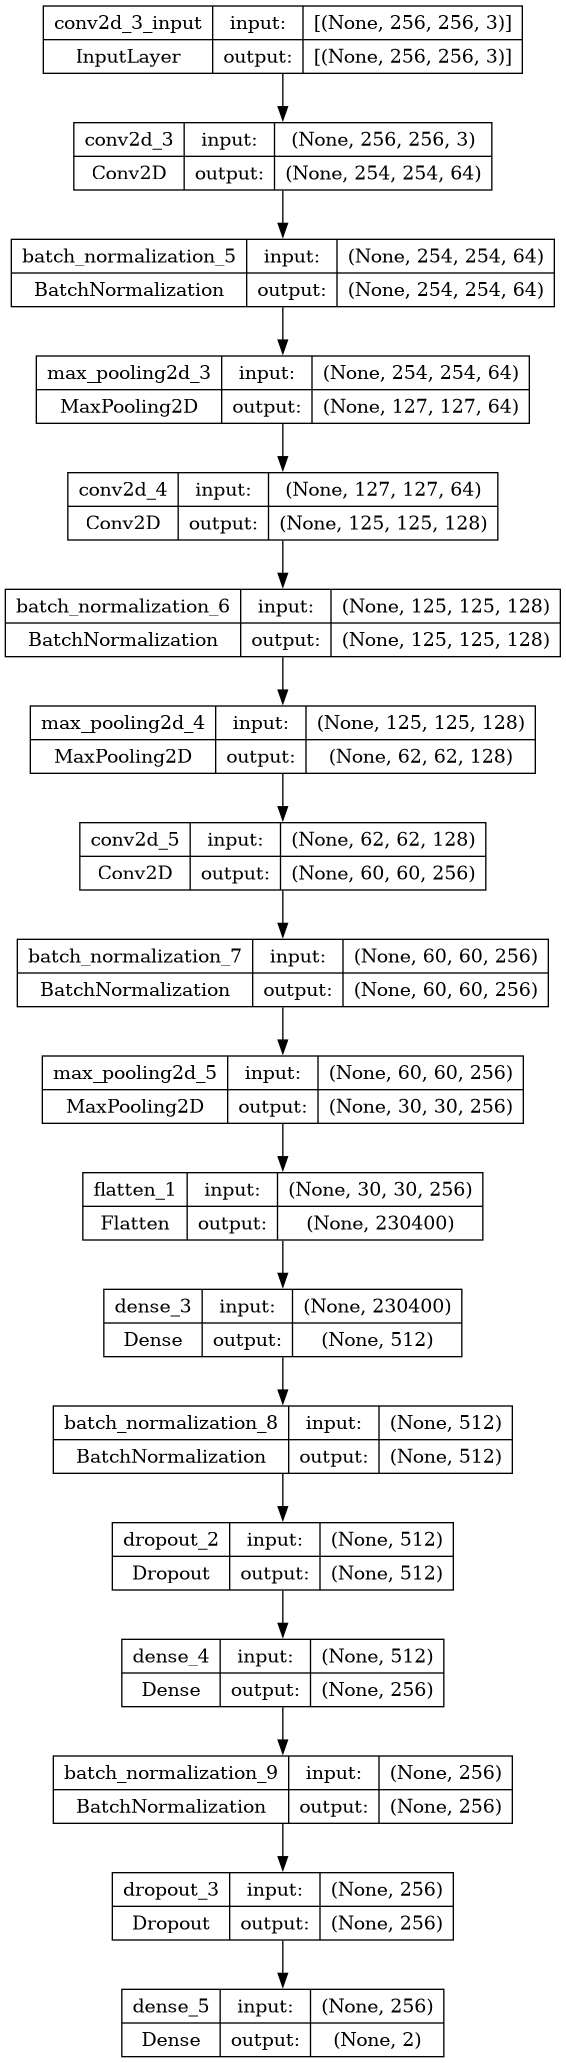

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [34]:
# import torch
# from torchviz import make_dot
# # generate a model architecture visualization
# make_dot(y.mean(),
#          params=dict(model.named_parameters()),
#          show_attrs=True,
#          show_saved=True).render("MyModel_torchviz", format="png")


In [20]:
# Training the model with early stopping and learning rate scheduler
history = model.fit(x=train_images,y=train_coor,batch_size=32,steps_per_epoch=len(train_images) // 32,
                    epochs=100,validation_data=(val_images, val_coor),callbacks=[lr_scheduler, early_stopping])

Epoch 1/100


I0000 00:00:1707111331.797637     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


65/65 [==============================] - 29s 249ms/step - loss: 21118.3730 - val_loss: 20635.0059 - lr: 0.0010
Epoch 2/100
65/65 [==============================] - 18s 210ms/step - loss: 20698.0664 - val_loss: 19783.8301 - lr: 0.0010
Epoch 3/100
65/65 [==============================] - 14s 209ms/step - loss: 19653.4902 - val_loss: 18914.1758 - lr: 0.0010
Epoch 4/100
65/65 [==============================] - 14s 210ms/step - loss: 17568.1055 - val_loss: 15094.6387 - lr: 0.0010
Epoch 5/100
65/65 [==============================] - 14s 211ms/step - loss: 14484.4492 - val_loss: 12733.4941 - lr: 0.0010
Epoch 6/100
65/65 [==============================] - 14s 212ms/step - loss: 10805.5273 - val_loss: 8688.1963 - lr: 0.0010
Epoch 7/100
65/65 [==============================] - 14s 213ms/step - loss: 7251.2710 - val_loss: 5213.0327 - lr: 0.0010
Epoch 8/100
65/65 [==============================] - 14s 215ms/step - loss: 4287.6826 - val_loss: 2821.4849 - lr: 0.0010
Epoch 9/100
65/65 [==============

In [55]:
# history.__dict__

In [21]:
# Save the model 
model.save("Face_single_pixel.h5", save_format="tf")
# load
loaded_model = tf.keras.models.load_model("/kaggle/working/Face_single_pixel.h5")


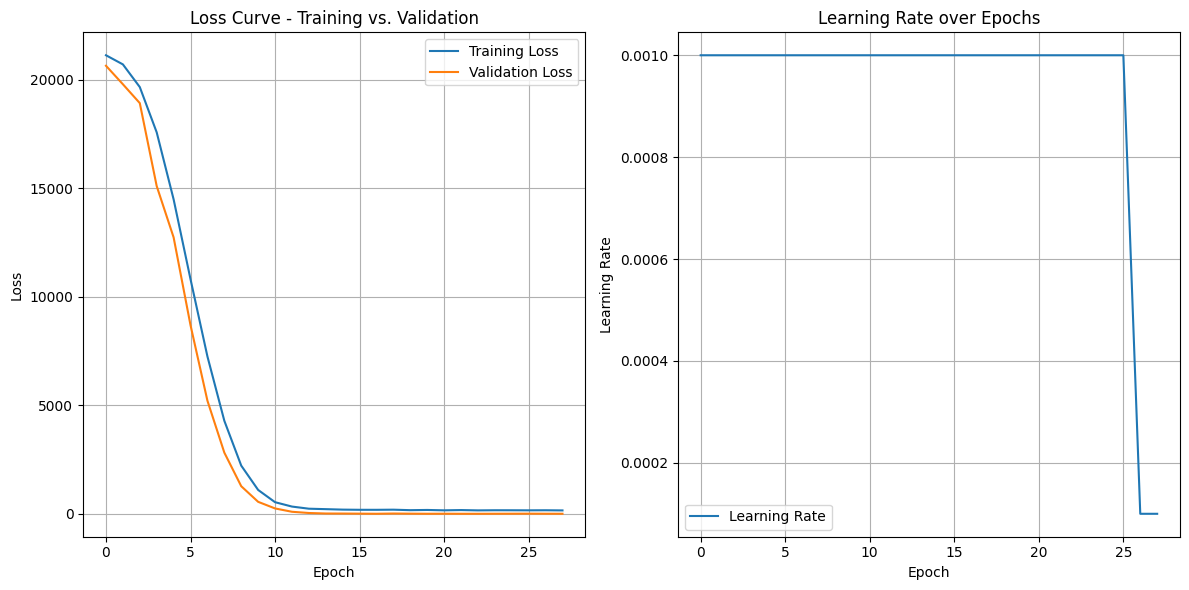

<Figure size 640x480 with 0 Axes>

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

# Loss comparison plot
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curve - Training vs. Validation')
axes[0].grid(True)
axes[0].legend()

# Epoch vs LR plot
axes[1].plot(history.history['lr'], label='Learning Rate')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Learning Rate')
axes[1].set_title('Learning Rate over Epochs')
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()
plt.savefig('training_analysis.png')


**Gradient visualzation**

In [52]:
%%capture
!pip install landscapeviz

In [54]:
# import landscapeviz
# # build mesh and plot
# landscapeviz.build_mesh(model, (train_Images, train_coor), grid_length=40, verbose=0)
# landscapeviz.plot_contour(key="mean_squared_error")
# landscapeviz.plot_3d(key="mean_squared_error")

#  **Test Model**

In [22]:
# Evaluation
test_loss = loaded_model.evaluate(test_images, test_coor)
print("Test Loss on unseen data:", test_loss)
y_pred = loaded_model.predict(test_images)


19/19 [==============================] - 3s 159ms/step - loss: 5.5066
Test Loss on unseen data: 5.50663948059082
19/19 [==============================] - 1s 47ms/step


1/1 [==============================] - 0s 18ms/step


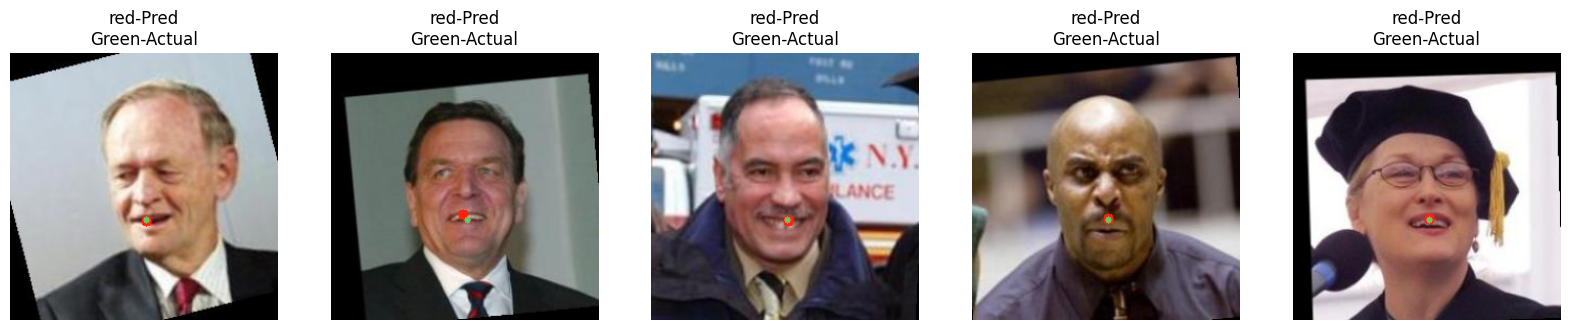

In [23]:
import matplotlib.pyplot as plt
def show_test_result(folder_path, num_images=5, target_size=(256, 256)):
  # Get a list of all image files in the folder
  all_images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
  # Randomly select num_images from the list
  selected_images = random.sample(all_images, min(num_images, len(all_images)))
  # Display and process each selected image
  fig, axes = plt.subplots(1, len(selected_images), figsize=(20, 5))
  for i,img_name in enumerate(selected_images):
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path,)
    img=cv2.resize(img,(256,256))
    # Check the shape of the image
    height, width, _ = img.shape
    # Draw circles around the specified points
    img=np.array(img)
    img=img/255.0
    points=loaded_model.predict(img.reshape(-1,256,256,3))
    points=points
    img=img*255
    img = img.astype(np.uint8)
    for point in points:
        x, y = point
        cv2.circle(img, (int(x), int(y)), 5, (10, 33, 255),-1)  
#     original_coord
    cv2.circle(img,(130,160),3,(100,200,100),-1)
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"red-Pred\nGreen-Actual")
    axes[i].axis('off')
  plt.show()
show_test_result('/kaggle/working/dataset_lfw_single_coor/test',)

In [24]:
def save_df_to_csv(img_array, pred_coor_array, actual_coor_array, filename):
    """
    Saves a DataFrame with columns for image paths, predicted coordinates, and actual coordinates to a CSV file.

    Args:
        img_array (list): A list of image paths or image data.
        pred_coor_array (list): A list of predicted coordinates, where each element is a list or tuple of (x, y) coordinates.
        actual_coor_array (list): A list of actual coordinates, where each element is a list or tuple of (x, y) coordinates.
        filename (str): The name of the CSV file to save.
    """

    data = {
        'img': img_array,
        'pred_coor': pred_coor_array,  
        'actual_coor': actual_coor_array
    }
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)


In [25]:
y_pred=list(zip(y_pred[:, 0], y_pred[:, 1]))
y_test=list(zip(test_coor[:, 0], test_coor[:, 1]))

In [26]:
y_pred[0]

(130.16667, 160.4245)

In [27]:
l=[]
for image_file in os.listdir('/kaggle/working/dataset_lfw_single_coor/test'):
    image_path = os.path.join('/kaggle/working/dataset_lfw_single_coor/test', image_file)
    l.append(image_path)
    
save_df_to_csv(l,y_test,y_pred,'test_result.csv')